/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


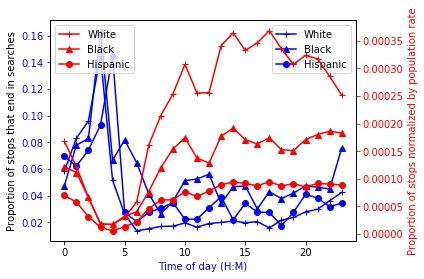

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

tx = pd.read_csv('TX-clean.csv', nrows=100000)
#tx = pd.read_csv('TX-clean.csv')

times = tx['stop_time']
race = tx['driver_race']
search = tx['search_conducted']

white = np.zeros((24,2))
hispanic = np.zeros((24,2))
black = np.zeros((24,2))
other = np.zeros((24,2))
hours = np.arange(24)

for x in range(1,len(times)):
    t1 = times[x]
    
    if (int(t1[0]) > 0):
        t2 = int(t1[:2])
    else:
        t2 = int(t1[1])

    if(race[x] == 'White'):
        white[t2,0] = white[t2,0] + 1
        if(search[x] == True):
            white[t2,1] = white[t2,1] + 1
    elif(race[x] == 'Black'):
        black[t2,0] = black[t2,0] + 1
        if(search[x] == True):
             black[t2,1] = black[t2,1] + 1
    elif(race[x] == 'Hispanic'):
        hispanic[t2,0] = hispanic[t2,0] + 1
        if(search[x] == True):
            hispanic[t2,1] = hispanic[t2,1] + 1
    else:
        other[t2,0] = other[t2,0] + 1
        if(search[x] == 'True'):
            other[t2,1] = other[t2,1] + 1


tot_pop = 29104064        
total = white[:,0]+black[:,0]+hispanic[:,0]+other[:,0]

white_prop = white[:,0]/(tot_pop*0.434)
black_prop = black[:,0]/(tot_pop*0.119)
hispanic_prop = hispanic[:,0]/(tot_pop*0.383)
other_prop = other[:,0]/(total*6.4)

white_prop_s =  white[:,1]/ white[:,0]
black_prop_s = black[:,1]/black[:,0]
hispanic_prop_s = hispanic[:,1]/hispanic[:,0]
other_prop_s = other[:,1]/other[:,0]

fig, ax1 = plt.subplots()
ax1.plot(hours,white_prop_s, 'b+-', label="White")
ax1.plot(hours,black_prop_s, 'b^-', label="Black")
ax1.plot(hours,hispanic_prop_s, 'bo-', label="Hispanic")
ax1.set_xlabel('Time of day (H:M)', color='b')

ax1.set_ylabel('Proportion of stops that end in searches')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(hours,white_prop, 'r+-', label="White")
ax2.plot(hours,black_prop, 'r^-', label="Black")
ax2.plot(hours,hispanic_prop, 'ro-', label="Hispanic")
ax2.set_ylabel('Proportion of stops normalized by population rate', color='r')
ax2.tick_params('y', colors='r')
ax1.legend(loc=0)
ax2.legend(loc=0)

fig.tight_layout()
plt.legend() 
plt.show()


